## Observations and Insights

## Dependencies and starter code

In [69]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy as sp

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
merged_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [457]:
from IPython.display import display, HTML
display(HTML(' <span style="color:#43609C">Obeservations: <h1>Pymaceuticals Analysis</h1> </span>  '))
display(HTML(' <ul><li>1. The outliner value found on Infubinol is on treatment stopped in earlier timepoint<br><img src="./output/FourRegimentStudyBoxPlot.png" /></li>  '))
display(HTML(' <li>2. The lower mean tumor volume is found in "Capomulin" & "Ramicane"<br> Capomulin Mean = 40.675741 <br> Ramicane Mean = 40.216745</li>  '))
display(HTML(' <li>3. Capomilin treatment has helped reduce the tumor volume considerably at different timepoints<br>eg.,<br><img src="./output/TumorVolumeVsTimepoint_Mouse_s185.png"></li></ul>  '))

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregimen= merged_data_complete.groupby("Drug Regimen")
#drugregimen["Tumor Volume (mm3)"].describe()
#Mean_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].describe()["mean"]
Mean_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].describe()["mean"]
Median_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].describe()["50%"]
STD_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].describe()["std"]
Variance_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].var()
SEM_TumorVolume_ForDrugs=drugregimen["Tumor Volume (mm3)"].sem()
Drug_Stat_Summary=pd.DataFrame({"Mean":Mean_TumorVolume_ForDrugs,"Median":Median_TumorVolume_ForDrugs,"Standard Deviation":STD_TumorVolume_ForDrugs,
                               "Variance":Variance_TumorVolume_ForDrugs,"SEM":SEM_TumorVolume_ForDrugs})
Drug_Stat_Summary

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [3]:
Statistics_Report_DF= pd.DataFrame(round(drugregimen["Tumor Volume (mm3)"].describe(),2))
Statistics_Report_DF

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

In [4]:
Statistics_TotalDataPoints= pd.DataFrame({"Count":round(drugregimen["Tumor Volume (mm3)"].count(),2)})
Statistics_TotalDataPoints

,Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


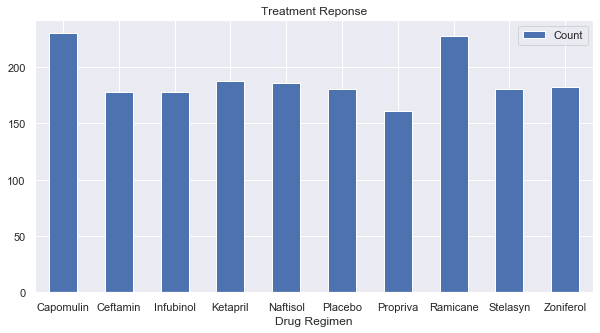

In [419]:
TotalDataPoints_Pandas_Bar_Plot=Statistics_TotalDataPoints.plot(kind="bar",title='Treatment Reponse',figsize=(10,5),rot=0)

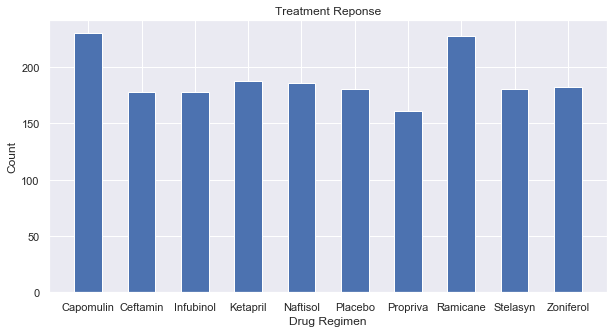

In [418]:
x_axis=Statistics_TotalDataPoints.index
plt.figure(figsize=(10,5))
plt.bar(x_axis, Statistics_TotalDataPoints["Count"], alpha=1, align="center",width=0.52)
plt.title("Treatment Reponse")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.savefig("./output/TreatmentResponse.png")
plt.show()

## Pie plots

In [7]:
GenderGroup= merged_data_complete.groupby("Sex")
GenderStatistics_TotalDataPoints= pd.DataFrame({"Count":round(GenderGroup["Tumor Volume (mm3)"].count(),2)})
GenderStatistics_TotalDataPoints

,Count
Sex,
Female,935
Male,958


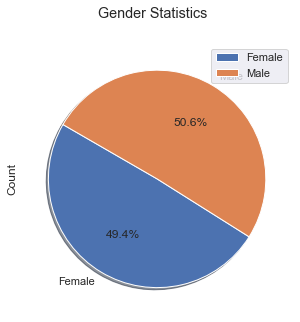

In [420]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
PieAngle=150
GenderStatistics_TotalDataPoints_Pandas_Pie=GenderStatistics_TotalDataPoints.plot.pie(figsize=(5, 5),subplots=True,title="Gender Statistics",autopct="%1.1f%%",shadow=True, startangle=PieAngle)
plt.savefig("./output/PandasGenderStatistics.png")

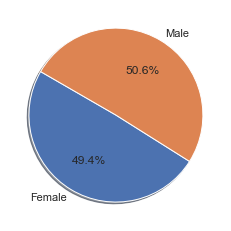

In [421]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(GenderStatistics_TotalDataPoints['Count'],explode=None,shadow=True, labels=GenderStatistics_TotalDataPoints.index,autopct="%1.1f%%",startangle=PieAngle)
plt.savefig("./output/PyplotGenderStatistics.png")
plt.show()

## Quartiles, outliers and boxplots

In [224]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin.
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

In [435]:
FourRegimensForStudy = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
Capomulin=pd.DataFrame((merged_data_complete.loc[(merged_data_complete["Drug Regimen"] == 'Capomulin')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Ramicane=pd.DataFrame((merged_data_complete.loc[(merged_data_complete["Drug Regimen"] == 'Ramicane')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Infubinol=pd.DataFrame((merged_data_complete.loc[(merged_data_complete["Drug Regimen"] == 'Infubinol')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Ceftamin=pd.DataFrame((merged_data_complete.loc[(merged_data_complete["Drug Regimen"] == 'Ceftamin')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())

In [346]:
CAQuartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
CALowerQ = CAQuartiles[0.25]
CAUpperQ = CAQuartiles[0.75]
CAIQR= CAUpperQ-CALowerQ
CALowerBound = CALowerQ - (1.5*CAIQR)
CAUpperBound = CAUpperQ + (1.5*CAIQR)
CapomulinPotentialOutlier = Capomulin.loc[(Capomulin['Tumor Volume (mm3)'] < CALowerBound) |( Capomulin['Tumor Volume (mm3)'] > CAUpperBound)]
Capomulin_Analysis = pd.DataFrame({"Drug":"Capomulin","LowerQ":CALowerQ,"Median":CAQuartiles[0.5],"UpperQ":CAUpperQ,"IQR":CAIQR,"Lower Bound":CALowerBound,"Upper Bound":CAUpperBound}, index=[0])
CapomulinPotentialOutlier

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,


In [353]:
RAQuartiles = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
RALowerQ = RAQuartiles[0.25]
RAUpperQ = RAQuartiles[0.75]
RAIQR= RAUpperQ-RALowerQ
RALowerBound = RALowerQ - (1.5*RAIQR)
RAUpperBound = RAUpperQ + (1.5*RAIQR)
RamicanePotentialOutlier = Ramicane.loc[(Ramicane['Tumor Volume (mm3)'] < RALowerBound) |( Ramicane['Tumor Volume (mm3)'] > RAUpperBound)]
Ramicane_Analysis = pd.DataFrame({"Drug":"Ramicane","LowerQ":RALowerQ,"Median":RAQuartiles[0.5],"UpperQ":RAUpperQ,"IQR":RAIQR,"Lower Bound":RALowerBound,"Upper Bound":RAUpperBound}, index=[0])
RamicanePotentialOutlier

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,


In [354]:
INQuartiles =Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
INLowerQ = INQuartiles[0.25]
INUpperQ = INQuartiles[0.75]
INIQR= INUpperQ-INLowerQ
INLowerBound = INLowerQ - (1.5*INIQR)
INUpperBound = INUpperQ + (1.5*INIQR)
InfubinolPotentialOutlier = Infubinol.loc[(Infubinol['Tumor Volume (mm3)'] < INLowerBound) |( Infubinol['Tumor Volume (mm3)'] > INUpperBound)]
Infubinol_Analysis = pd.DataFrame({"Drug":"Infubinol","LowerQ":INLowerQ,"Median":INQuartiles[0.5],"UpperQ":INUpperQ,"IQR":INIQR,"Lower Bound":INLowerBound,"Upper Bound":INUpperBound}, index=[0])
InfubinolPotentialOutlier

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
c326,Infubinol,Female,18,25,5,36.321346,0


In [355]:
Quartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
LowerQ = Quartiles[0.25]
UpperQ = Quartiles[0.75]
IQR= UpperQ-LowerQ
LowerBound = LowerQ - (1.5*IQR)
UpperBound = UpperQ + (1.5*IQR)
CeftaminPotentialOutlier = Ceftamin.loc[(Ceftamin['Tumor Volume (mm3)'] < LowerBound) |( Ceftamin['Tumor Volume (mm3)'] > UpperBound)]
Ceftamin_Analysis = pd.DataFrame({"Drug":"Ceftamin","LowerQ":LowerQ,"Median":Quartiles[0.5],"UpperQ":UpperQ,"IQR":IQR,"Lower Bound":LowerBound,"Upper Bound":UpperBound}, index=[0])
CeftaminPotentialOutlier 

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,


In [351]:
FourRegimen_Analysis=pd.DataFrame()
FourRegimen_Analysis=FourRegimen_Analysis.append(Capomulin_Analysis)
FourRegimen_Analysis=FourRegimen_Analysis.append(Ramicane_Analysis)
FourRegimen_Analysis=FourRegimen_Analysis.append(Infubinol_Analysis)
FourRegimen_Analysis=FourRegimen_Analysis.append(Ceftamin_Analysis)
FourRegimen_Analysis

,Drug,LowerQ,Median,UpperQ,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
0,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
0,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
0,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


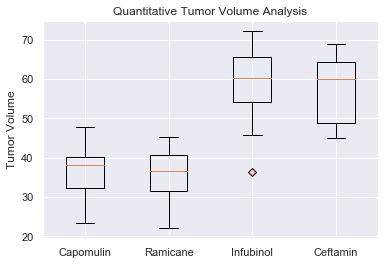

In [422]:
fig1, ax1 = plt.subplots()
ax1.set_title('Quantitative Tumor Volume Analysis')
ax1.set_ylabel('Tumor Volume')
treatment_data = [Capomulin["Tumor Volume (mm3)"],Ramicane["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"]]
ax1.boxplot(treatment_data,flierprops=PinkDiamond,labels=FourRegimensForStudy)
plt.savefig("./output/FourRegimentStudyBoxPlot.png")
plt.show()

## Line and scatter plots

In [359]:
TumorVolumeSEM = merged_data_complete.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"]
TumorVolumeSEM = pd.DataFrame(TumorVolumeSEM)
TumorVolumeSEM.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

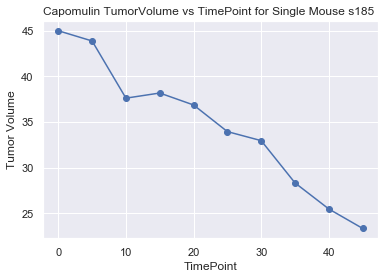

In [423]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#First Mouse Sample s185
Capomulin_Data=merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin']
PickOneMouse=Capomulin_Data["Mouse ID"].head(1)
PickOneMouse="s185"
Capomulin_Data_Fors185=pd.DataFrame({"Timepoint":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == "s185"]["Timepoint"],"Tumor Volume (mm3)":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == "s185"]["Tumor Volume (mm3)"]})
x=Capomulin_Data_Fors185["Timepoint"]
y=Capomulin_Data_Fors185["Tumor Volume (mm3)"]
plt.plot(x,y,marker="o")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin TumorVolume vs TimePoint for Single Mouse s185 ")
plt.savefig("./output/TumorVolumeVsTimepoint_Mouse_s185.png")
plt.show()

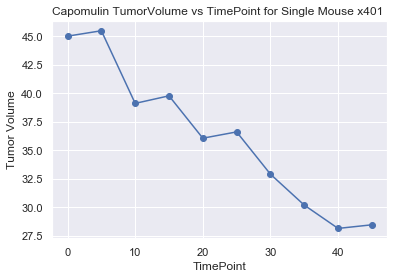

In [424]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Second Mouse Sample - x401
Capomulin_Data=merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin']
PickOneMouse=Capomulin_Data["Mouse ID"].head(1)
PickOneMouse="x401"
Capomulin_Data_Forx401=pd.DataFrame({"Timepoint":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == "x401"]["Timepoint"],"Tumor Volume (mm3)":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == "x401"]["Tumor Volume (mm3)"]})
x=Capomulin_Data_Forx401["Timepoint"]
y=Capomulin_Data_Forx401["Tumor Volume (mm3)"]
plt.plot(x,y,marker="o")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin TumorVolume vs TimePoint for Single Mouse x401 ")
plt.savefig("./output/TumorVolumeVsTimepoint_Mouse_x401.png")
plt.show()

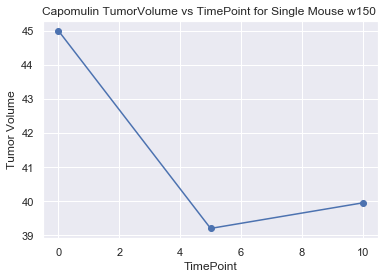

In [443]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Third Mouse Sample - w150
Capomulin_Data=merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin']
PickOneMouse="w150"
Capomulin_Data_Forw150=pd.DataFrame({"Timepoint":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == PickOneMouse]["Timepoint"],"Tumor Volume (mm3)":Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == PickOneMouse]["Tumor Volume (mm3)"]})
x=Capomulin_Data_Forw150["Timepoint"]
y=Capomulin_Data_Forw150["Tumor Volume (mm3)"]
plt.plot(x,y,marker="o")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin TumorVolume vs TimePoint for Single Mouse w150 ")
plt.savefig("./output/TumorVolumeVsTimepoint_Mouse_w150.png")
plt.show()

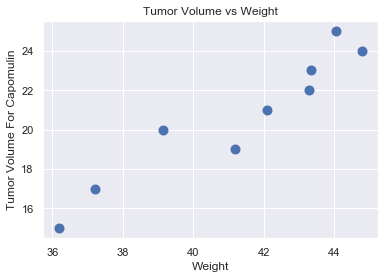

In [444]:
########## METHOD 1 ##############################################################################
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Weight_MeanTV =pd.DataFrame(merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin'].groupby('Weight (g)')["Tumor Volume (mm3)"].mean())
plt.scatter(Capomulin_Weight_MeanTV,Capomulin_Weight_MeanTV.index,marker='o',edgecolors='face',linewidth=4,cmap='viridis')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume For Capomulin")
plt.title("Tumor Volume vs Weight")
plt.savefig("./output/TumorVolumeVsWeightForCapomulin.png")
plt.show()
#merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin'].groupby('Weight (g)')["Tumor Volume (mm3)"].mean()

In [410]:
Average_TumorVolume_Capomulin=Capomulin["Tumor Volume (mm3)"].mean()
Average_TumorVolume_Capomulin

36.6675677192

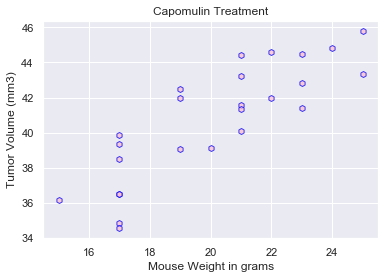

In [445]:
Capomulin_DataFrame=merged_data_complete.loc[merged_data_complete["Drug Regimen"] == 'Capomulin']
Capomulin_Weight_Data=Capomulin_DataFrame.groupby("Mouse ID")['Weight (g)'].mean()
Capomulin_TumorVolume_Data=Capomulin_DataFrame.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
plt.scatter([Capomulin_Weight_Data], [Capomulin_TumorVolume_Data], marker="h", facecolors="pink", edgecolors="blue", alpha=0.75)
plt.title("Capomulin Treatment")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("./output/CapomulinTreatment.png")
plt.show()

In [412]:
Capomulin_Correlation_Coeff = st.pearsonr(Capomulin_Weight_Data,Capomulin_TumorVolume_Data)
print(f"The Correlation Coefficient between Capomulin Weight and Tumour Volume is {round(Capomulin_Correlation_Coeff [0],2)}")

The Correlation Coefficient between Capomulin Weight and Tumour Volume is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

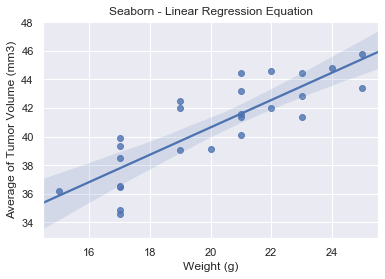

In [446]:
#Linear Regression using Seaborn
import seaborn as sb
fig5, ax5 = plt.subplots()
sb.set(color_codes=True)
df = pd.DataFrame(list(zip(Capomulin_Weight_Data, Capomulin_TumorVolume_Data)))
sb.regplot(x=Capomulin_Weight_Data, y=Capomulin_TumorVolume_Data, data=df);

plt.xlabel("Weight (g)")
plt.ylabel("Average of Tumor Volume (mm3)")
plt.title("Seaborn - Linear Regression Equation")
plt.savefig("./output/SeabornLinearRegression.png")
plt.show

In [390]:
########## METHOD 2 ##############################################################################
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
import statsmodels.api as sm
from sklearn import linear_model
#Linear Regression
#In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. 
#For more than one independent variable, the process is called mulitple linear regression. We will be dealing with simple linear regression in this tutorial.
#Let X be the independent variable and Y be the dependent variable. 
#We will define a linear relationship between these two variables as follows:
# Y = mX + C

In [152]:
X = Capomulin_TumorVolume_Data
y = Capomulin_Weight_Data

# Note the difference in argument order - Ordinary Least Square
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Weight (g)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3376.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                    2.47e-27
Time:                        13:48:03   Log-Likelihood:                         -48.838
No. Observations:                  25   AIC:                                      99.68
Df Residuals:                      24   BIC:                                      100.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Tumor Volume (mm3)     0.4952      0.009     58.103      0.000       0.478       0.513
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.699
Skew:                           0.116   Prob(JB):                        0.705
Kurtosis:                       2.215   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

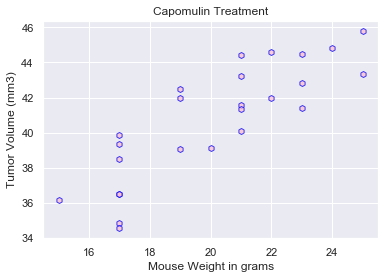

In [393]:
lm = linear_model.LinearRegression()
X = Capomulin_Weight_Data
Y = Capomulin_TumorVolume_Data
plt.scatter(X, Y,marker="h", facecolors="pink", edgecolors="blue", alpha=0.75)
plt.title("Capomulin Treatment")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

0.9544396890241045 21.552160532685015


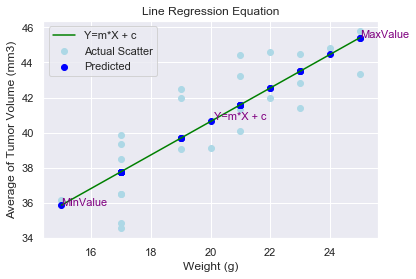

In [447]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

#Least Square Method 
#===========================================================
# Formula 
# m=(x(i)-avg(x))(y(i)-avg(y))/(x(i)-avg(x))**2
#===========================================================

#Initalize the Numerator and Denomenator for "m" calculation
Numerator = 0
Denomenator = 0

#loop through the X to calculate "m"

for i in range(len(X)):
    Numerator += (X[i] - X_mean)*(Y[i] - Y_mean)
    Denomenator += (X[i] - X_mean)**2
m = Numerator / Denomenator
c = Y_mean - m*X_mean

print (m, c)
# Making predictions
PredictiveAnalysis_Y = m*X + c
#Actual
plt.scatter(X, Y,color='lightblue',label="Actual Scatter") # actual
plt.scatter(X, PredictiveAnalysis_Y, color='blue',label="Predicted")
# Predicted
plt.plot([min(X), max(X)], [min(PredictiveAnalysis_Y), max(PredictiveAnalysis_Y)], color='green',label="Y=m*X + c") 
plt.text(min(X),min(PredictiveAnalysis_Y), 
         r'MinValue',
         fontdict={'size':11,'color':'purple'})
plt.text(X.mean(),PredictiveAnalysis_Y.mean(), 
         r'Y=m*X + c',
         fontdict={'size':11,'color':'purple'})
plt.text(max(X),max(PredictiveAnalysis_Y), 
         r'MaxValue',
         fontdict={'size':11,'color':'purple'})

plt.xlabel("Weight (g)")
plt.ylabel("Average of Tumor Volume (mm3)")
plt.title("Line Regression Equation")
plt.legend()
plt.savefig("./output/LinearRegression.png")
plt.show()